# **Can you predict whether a customer will churn or not?**

## **Understanding Problem Statement**

Decreasing the Customer Churn is a key goal for any business. Predicting Customer Churn (also known as Customer Attrition) represents an additional potential revenue source for any business. Customer Churn impacts the cost to the business. Higher Customer Churn leads to loss in revenue and the additional marketing costs involved with replacing those customers with new ones.

In this challenge, as a data scientist of a bank, you are asked to analyze the past data and predict whether the customer will churn or not in the next 6 months. This would help the bank to have the right engagement with customers at the right time.

## Objective
Our objective is to build a machine learning model to predict whether the customer will churn or not in the next six months.

# Exploratory Data Analysis

In [99]:
# Installation of required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression  
from sklearn.neighbors import KNeighborsClassifier  
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
# !pip install catboost
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import accuracy_score,f1_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score, GridSearchCV

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 
warnings.filterwarnings("ignore", category=FutureWarning) 
warnings.filterwarnings("ignore", category=UserWarning) 



# to display all columns and rows:
pd.set_option('display.max_columns', None); pd.set_option('display.max_rows', None);

In [46]:
# Use Pandas read_csv method to read training and testing csv's
# traindf and testdf are Pandas dataframe 

train_df = pd.read_csv('/content/train.csv')
test_df = pd.read_csv('/content/test.csv')

In [47]:
# The first 5 observation units of the data set were accessed.
train_df.head()

,ID,Age,Gender,Income,Balance,Vintage,Transaction_Status,Product_Holdings,Credit_Card,Credit_Category,Is_Churn
0,84e2fcc9,36,Female,5L - 10L,563266.44,4,0,1,0,Average,1
1,57fea15e,53,Female,Less than 5L,875572.11,2,1,1,1,Poor,0
2,8df34ef3,35,Female,More than 15L,701607.06,2,1,2,0,Poor,0
3,c5c0788b,43,Female,More than 15L,1393922.16,0,1,2,1,Poor,1
4,951d69c4,39,Female,More than 15L,893146.23,1,1,1,1,Good,1


In [48]:
# The size of the data set was examined. It consists of 6650 observation units and 11 variables.
train_df.shape

(6650, 11)

In [49]:
# Feature information
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6650 entries, 0 to 6649
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  6650 non-null   object 
 1   Age                 6650 non-null   int64  
 2   Gender              6650 non-null   object 
 3   Income              6650 non-null   object 
 4   Balance             6650 non-null   float64
 5   Vintage             6650 non-null   int64  
 6   Transaction_Status  6650 non-null   int64  
 7   Product_Holdings    6650 non-null   object 
 8   Credit_Card         6650 non-null   int64  
 9   Credit_Category     6650 non-null   object 
 10  Is_Churn            6650 non-null   int64  
dtypes: float64(1), int64(5), object(5)
memory usage: 571.6+ KB


In [50]:
# Descriptive statistics of the data set accessed.
train_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,6650.0,41.130226,9.685747,21.0,34.0000,40.000,47.00,72.00
Balance,6650.0,804595.354985,515754.867315,63.0,392264.2125,764938.575,1147123.71,2436615.81
Vintage,6650.0,2.250226,1.458795,0.0,1.0000,2.000,3.00,5.00
Transaction_Status,6650.0,0.515789,0.499788,0.0,0.0000,1.000,1.00,1.00
Credit_Card,6650.0,0.664361,0.472249,0.0,0.0000,1.000,1.00,1.00
Is_Churn,6650.0,0.231128,0.421586,0.0,0.0000,0.000,0.00,1.00


In [51]:
# The average of the age variable was taken according to the dependent variable.
train_df.groupby("Is_Churn").agg("mean")

,Age,Balance,Vintage,Transaction_Status,Credit_Card
Is_Churn,,,,,
0,40.045375,788653.739642,2.234109,0.539605,0.66458
1,44.739102,857626.896461,2.303839,0.436565,0.66363


In [52]:
# The average of the dependent variable according to the gender variable was examined.
train_df.groupby("Gender").agg({"Is_Churn": "mean"})

,Is_Churn
Gender,
Female,0.25576
Male,0.21041


In [53]:
# The frequency of the dependent variable has been reached.
train_df["Is_Churn"].value_counts()

0    5113
1    1537
Name: Is_Churn, dtype: int64

In [54]:
# Access to those who left us through the dependent variable. (Is_Churn == 1)
churn = train_df[train_df["Is_Churn"] == 1]

In [55]:
# The first 5 observation units were reached.
churn.head()

,ID,Age,Gender,Income,Balance,Vintage,Transaction_Status,Product_Holdings,Credit_Card,Credit_Category,Is_Churn
0,84e2fcc9,36,Female,5L - 10L,563266.44,4,0,1,0,Average,1
3,c5c0788b,43,Female,More than 15L,1393922.16,0,1,2,1,Poor,1
4,951d69c4,39,Female,More than 15L,893146.23,1,1,1,1,Good,1
7,f422388a,41,Female,10L - 15L,1587489.75,4,0,1,1,Poor,1
8,773aa149,60,Female,10L - 15L,1465812.54,0,0,1,1,Poor,1


In [56]:
# Who left most than the gender variable?
churn.groupby("Gender").agg({"Is_Churn": "count"})

,Is_Churn
Gender,
Female,777
Male,760


In [57]:
# How was the product holdings?
churn.groupby("Product_Holdings").agg({"Is_Churn": "count"})

,Is_Churn
Product_Holdings,
1,786
2,692
3+,59


In [58]:
# Access to those who left us through the dependent variable. (Is_Chrun == 0)
non_churn = train_df[train_df["Is_Churn"] == 0]

In [59]:
# The first 5 observation units were reached.
non_churn.head()

,ID,Age,Gender,Income,Balance,Vintage,Transaction_Status,Product_Holdings,Credit_Card,Credit_Category,Is_Churn
1,57fea15e,53,Female,Less than 5L,875572.11,2,1,1,1,Poor,0
2,8df34ef3,35,Female,More than 15L,701607.06,2,1,2,0,Poor,0
5,e7a8332a,31,Female,Less than 5L,111026.79,4,1,1,0,Good,0
6,f2de1836,56,Male,Less than 5L,1072102.23,2,1,2,1,Average,0
9,443be80f,32,Female,5L - 10L,770796.81,3,0,1,1,Poor,0


In [60]:
# Size information has been accessed.
non_churn.shape

(5113, 11)

In [61]:
# Who retained most than the gender variable?
non_churn.groupby("Gender").agg({"Is_Churn": "count"})

,Is_Churn
Gender,
Female,2261
Male,2852


In [62]:
# How was the product holdings?
non_churn.groupby("Product_Holdings").agg({"Is_Churn": "count"})

,Is_Churn
Product_Holdings,
1,2414
2,2490
3+,209


In [63]:
# Unique observation units were examined.
train_df.nunique()

ID                    6650
Age                     52
Gender                   2
Income                   4
Balance               6643
Vintage                  6
Transaction_Status       2
Product_Holdings         3
Credit_Card              2
Credit_Category          3
Is_Churn                 2
dtype: int64

In [64]:
# They were grouped by gender variable and looked at how many years on average they were clients.
train_df.groupby(['Gender','Is_Churn']).agg({'Vintage':'mean'})

Vintage
Gender Is_Churn          
Female 0         2.232198
       1         2.314028
Male   0         2.235624
       1         2.293421

In [65]:
# Min, mean and max values ​​of all variables were taken according to the dependent variable.
train_df.groupby("Is_Churn").agg(["min","mean","max"])

Age                Balance                            Vintage  \
         min       mean max     min           mean         max     min   
Is_Churn                                                                 
0         21  40.045375  72    63.0  788653.739642  2436615.81       0   
1         22  44.739102  72  1017.0  857626.896461  2424060.81       0   

                       Transaction_Status               Credit_Card           \
              mean max                min      mean max         min     mean   
Is_Churn                                                                       
0         2.234109   5                  0  0.539605   1           0  0.66458   
1         2.303839   5                  0  0.436565   1           0  0.66363   

              
         max  
Is_Churn      
0          1  
1          1

In [66]:
# Transaction Status is grouped according to credit_card type and dependant variable is examined.

train_df.groupby(['Transaction_Status','Credit_Card']).agg({'Is_Churn':'count'})

Is_Churn
Transaction_Status Credit_Card          
0                  0                1091
                   1                2129
1                  0                1141
                   1                2289

In [67]:
# Transaction Status is grouped according to Balance and dependant variable is examined.

train_df.groupby(['Transaction_Status','Credit_Card']).agg({'Balance':'mean'})

Balance
Transaction_Status Credit_Card               
0                  0            818251.848066
                   1            801692.956966
1                  0            827387.696556
                   1            789424.498585

In [68]:
# The balance variable was examined according to the gender variable.
train_df.groupby("Gender").agg({"Balance": "mean"})

,Balance
Gender,
Female,794728.483163
Male,812894.235548


In [69]:
# How many people whose balance is 0 and do not leave?
train_df[(train_df["Balance"] == 0) & (train_df["Is_Churn"] == 0)].shape

(0, 11)

In [70]:
# Access to the correlation of the data set was provided. What kind of relationship is examined between the variables. 
# If the correlation value is> 0, there is a positive correlation. While the value of one variable increases, the value of the other variable also increases.
# Correlation = 0 means no correlation.
# If the correlation is <0, there is a negative correlation. While one variable increases, the other variable decreases. 
# When the correlations are examined, there are 1 variables that act as a positive correlation to the exited dependent variable.
# This variable is Age. As this increases, the Result variable increases.
train_df.corr()

,Age,Balance,Vintage,Transaction_Status,Credit_Card,Is_Churn
Age,1.000000,0.002154,0.017353,0.032166,0.012089,0.204301
Balance,0.002154,1.000000,-0.019385,-0.005088,-0.025259,0.056380
Vintage,0.017353,-0.019385,1.000000,-0.027286,0.001856,0.020152
Transaction_Status,0.032166,-0.005088,-0.027286,1.000000,0.006526,-0.086917
Credit_Card,0.012089,-0.025259,0.001856,0.006526,1.000000,-0.000848
Is_Churn,0.204301,0.056380,0.020152,-0.086917,-0.000848,1.000000


# Data Visualization

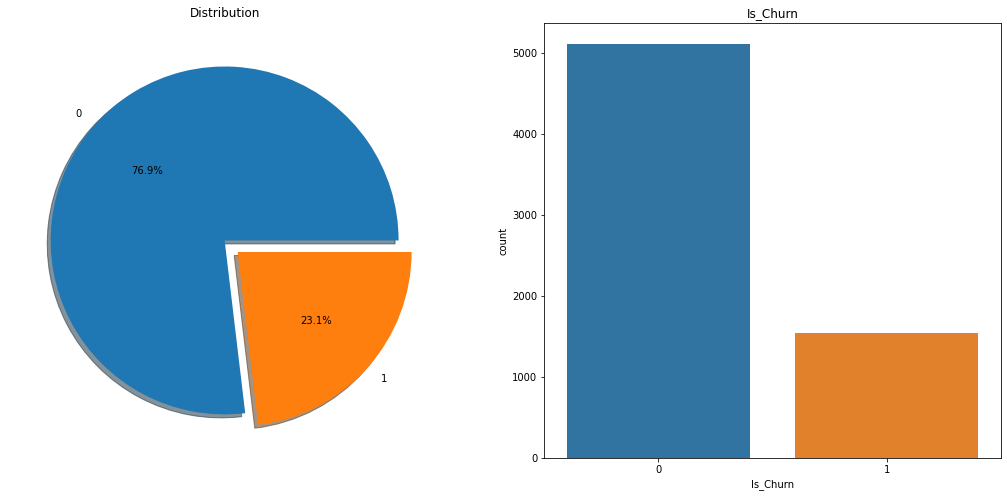

In [71]:
# The distribution of the dependent variable in the dataset is plotted as pie and columns graphs.
f,ax=plt.subplots(1,2,figsize=(18,8))
train_df['Is_Churn'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Distribution')
ax[0].set_ylabel('')
sns.countplot('Is_Churn',data=train_df,ax=ax[1])
ax[1].set_title('Is_Churn')
plt.show()

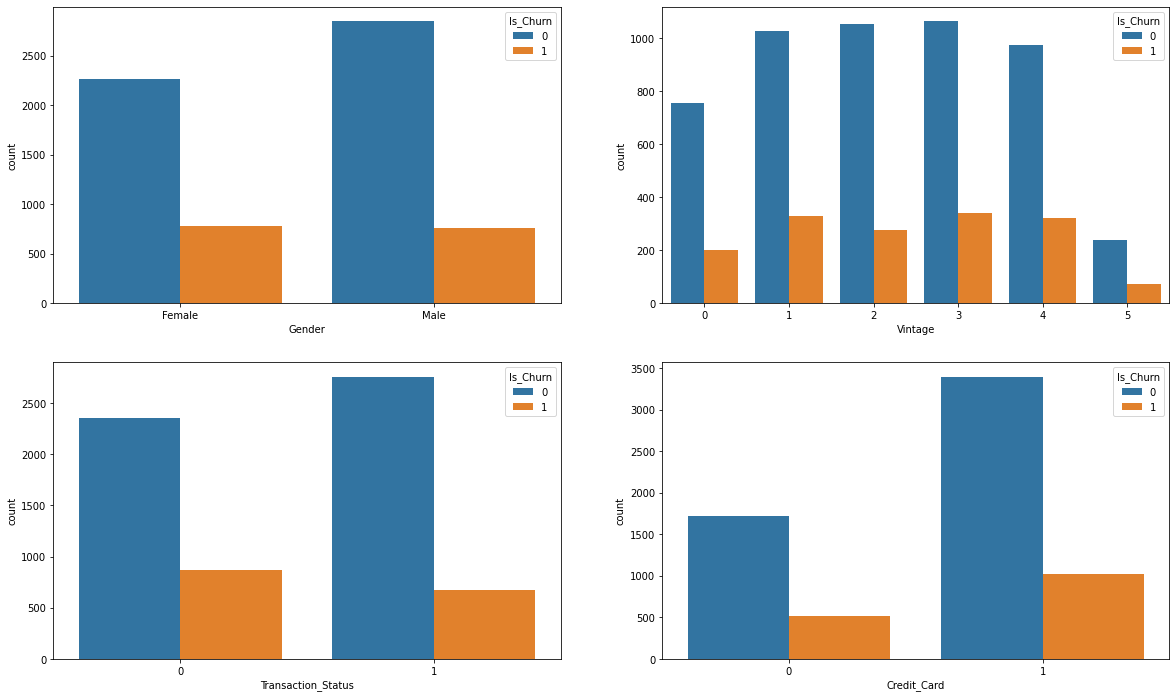

In [72]:
# Plotted the categorical variables on the basis of the graph of the column according to the dependent variable.

fig,axarr = plt.subplots(2,2,figsize=(20,12))
sns.countplot(x='Gender',hue='Is_Churn',data=train_df,ax=axarr[0][0])
sns.countplot(x='Vintage',hue='Is_Churn',data=train_df,ax=axarr[0][1])
sns.countplot(x='Transaction_Status',hue='Is_Churn',data=train_df,ax=axarr[1][0])
sns.countplot(x='Credit_Card',hue='Is_Churn',data=train_df,ax=axarr[1][1])

In [73]:
# The distribution of the dependent variable according to the gender variable is plotted in the pie chart.
import plotly.express as px
fig = px.pie(train_df,values=train_df.groupby('Gender')['Is_Churn'].value_counts(),names=['Female0','Female1','Male0','Male1'])
fig.show()

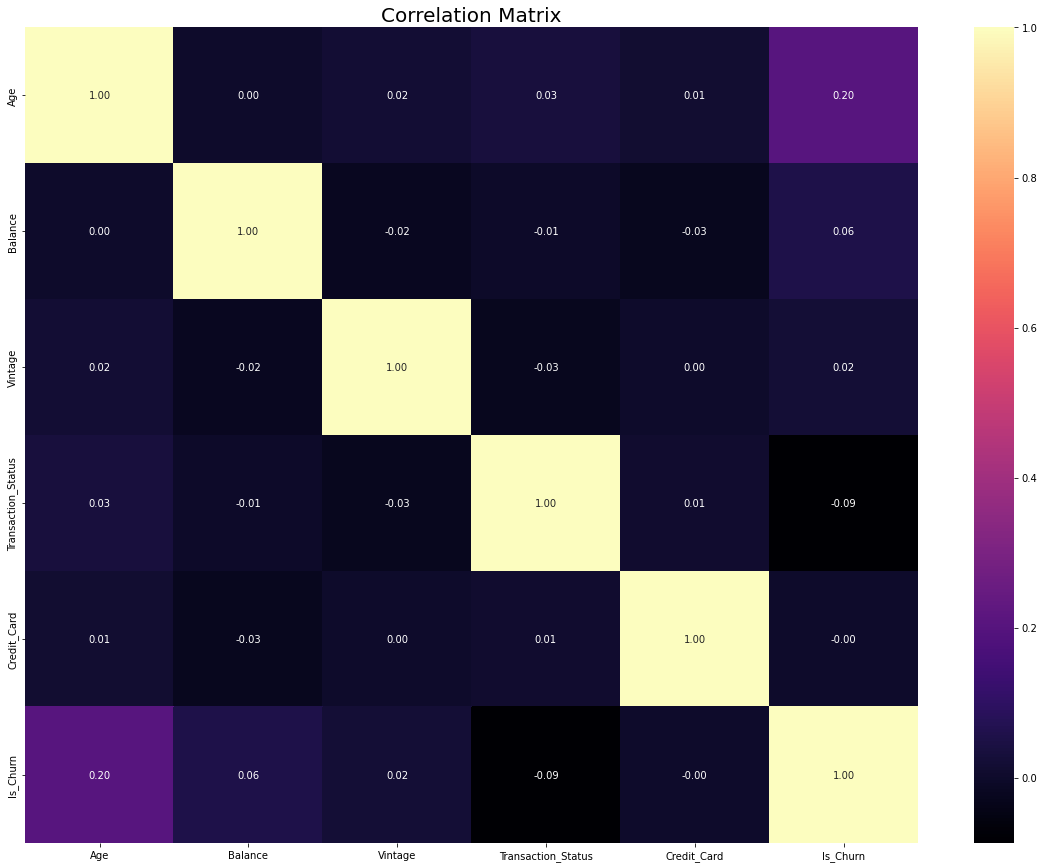

In [74]:
# Correlation Matrix

f,ax = plt.subplots(figsize=(20,15))
sns.heatmap(train_df.corr(),annot=True,fmt='.2f',ax=ax,cmap='magma')
ax.set_title('Correlation Matrix',fontsize=20)
plt.show()

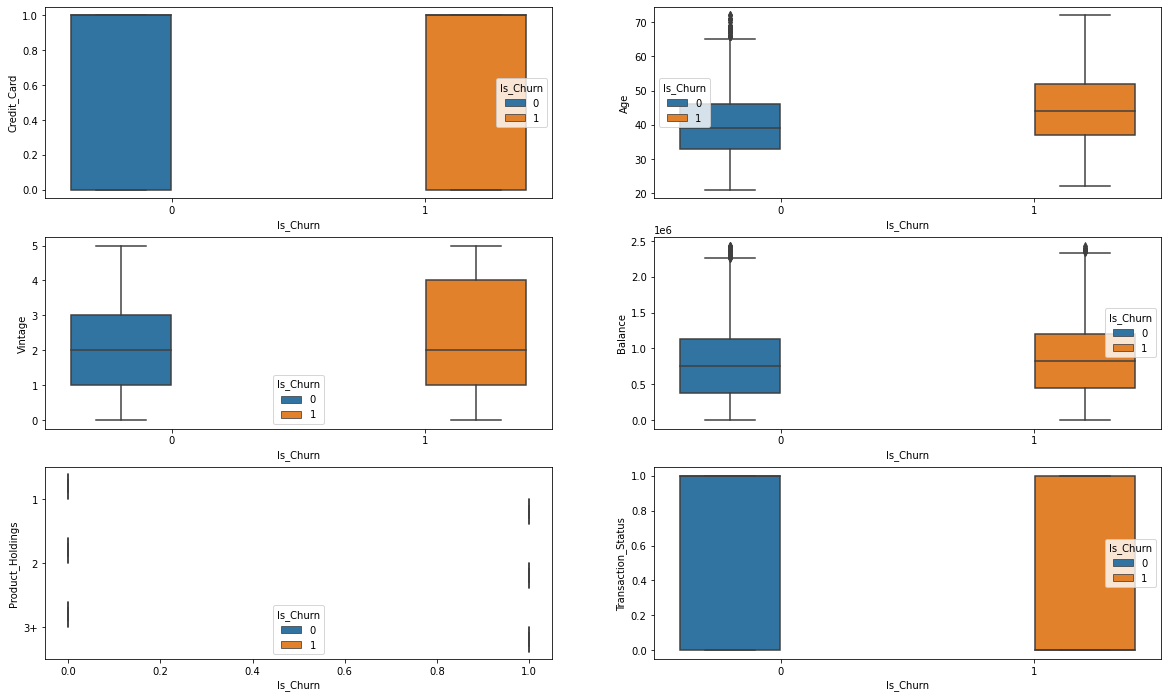

In [75]:
# Boxplot graph for outlier observation analysis
fig, axarr = plt.subplots(3, 2, figsize=(20, 12))
sns.boxplot(y='Credit_Card',x = 'Is_Churn', hue = 'Is_Churn',data = train_df, ax=axarr[0][0])
sns.boxplot(y='Age',x = 'Is_Churn', hue = 'Is_Churn',data = train_df , ax=axarr[0][1])
sns.boxplot(y='Vintage',x = 'Is_Churn', hue = 'Is_Churn',data = train_df, ax=axarr[1][0])
sns.boxplot(y='Balance',x = 'Is_Churn', hue = 'Is_Churn',data = train_df, ax=axarr[1][1])
sns.boxplot(y='Product_Holdings',x = 'Is_Churn', hue = 'Is_Churn',data = train_df, ax=axarr[2][0])
sns.boxplot(y='Transaction_Status',x = 'Is_Churn', hue = 'Is_Churn',data = train_df, ax=axarr[2][1])

# Data Preprocessing

In [76]:
# Look for missing values

train_df.isnull().sum()
test_df.isnull().sum()

ID                    0
Age                   0
Gender                0
Income                0
Balance               0
Vintage               0
Transaction_Status    0
Product_Holdings      0
Credit_Card           0
Credit_Category       0
dtype: int64

# Feature Engineering

In [77]:
test_df.head()

,ID,Age,Gender,Income,Balance,Vintage,Transaction_Status,Product_Holdings,Credit_Card,Credit_Category
0,55480787,50,Female,More than 15L,1008636.39,2,1,2,1,Average
1,9aededf2,36,Male,5L - 10L,341460.72,2,0,2,1,Average
2,a5034a09,25,Female,10L - 15L,439460.10,0,0,2,1,Good
3,b3256702,41,Male,Less than 5L,28581.93,0,1,2,1,Poor
4,dc28adb5,48,Male,More than 15L,1104540.03,2,1,3+,0,Good


In [78]:
train_df.head()

,ID,Age,Gender,Income,Balance,Vintage,Transaction_Status,Product_Holdings,Credit_Card,Credit_Category,Is_Churn
0,84e2fcc9,36,Female,5L - 10L,563266.44,4,0,1,0,Average,1
1,57fea15e,53,Female,Less than 5L,875572.11,2,1,1,1,Poor,0
2,8df34ef3,35,Female,More than 15L,701607.06,2,1,2,0,Poor,0
3,c5c0788b,43,Female,More than 15L,1393922.16,0,1,2,1,Poor,1
4,951d69c4,39,Female,More than 15L,893146.23,1,1,1,1,Good,1


In [79]:
# Feature Engineering
from sklearn.preprocessing import MinMaxScaler,StandardScaler

df_scaled = train_df.copy() # make a copy of train data
col_names= ['Age'] #columns to scale 
features = df_scaled[col_names]

scaler = StandardScaler() #use MinMax Scaler to scale 
df_scaled[col_names] = scaler.fit_transform(features.values)
test_df[col_names] = scaler.transform(test_df[col_names].values)

In [80]:
# Convert Categorical columns into integer

def preprocessing(var):

         
    for i in [var]:
        var['Gender'] = var['Gender'].map({'Male':0,'Female':1})
        var['Credit_Category'] = var['Credit_Category'].map({'Poor':0,'Average':1,'Good':2})
        var['Product_Holdings']= var['Product_Holdings'].map({'1':1,'2':2,'3+':3})
    
    return var

#convert Income column to Categorical integers
df = preprocessing(df_scaled)
df['Income'] = df['Income'].astype('category')
# %%
df['Income'] = df['Income'].cat.codes
df
test_df = preprocessing(test_df)
test_df['Income'] = test_df['Income'].astype('category')
# %%
test_df['Income'] = test_df['Income'].cat.codes

In [81]:
train_df.shape,test_df.shape #check shape of data

((6650, 11), (2851, 10))

In [82]:
df['Qincome'] = df['Income']/3  # add new columns QIncome which is Quaterly income this feature has high significance.
test_df['Qincome']=test_df['Income']/3

In [83]:
df.drop(['Income','Balance','ID'],axis=1,inplace=True) #Drop the columns which are less significant
test_df.drop(['Income','Balance'],axis=1,inplace=True)

In [84]:
train_df.head() # see how train data looks

,ID,Age,Gender,Income,Balance,Vintage,Transaction_Status,Product_Holdings,Credit_Card,Credit_Category,Is_Churn
0,84e2fcc9,36,Female,5L - 10L,563266.44,4,0,1,0,Average,1
1,57fea15e,53,Female,Less than 5L,875572.11,2,1,1,1,Poor,0
2,8df34ef3,35,Female,More than 15L,701607.06,2,1,2,0,Poor,0
3,c5c0788b,43,Female,More than 15L,1393922.16,0,1,2,1,Poor,1
4,951d69c4,39,Female,More than 15L,893146.23,1,1,1,1,Good,1


In [85]:
test_df.head() # See how test data looks now

,ID,Age,Gender,Vintage,Transaction_Status,Product_Holdings,Credit_Card,Credit_Category,Qincome
0,55480787,0.915824,1,2,1,2,1,1,1.000000
1,9aededf2,-0.529707,0,2,0,2,1,1,0.333333
2,a5034a09,-1.665482,1,0,0,2,1,2,0.000000
3,b3256702,-0.013446,0,0,1,2,1,0,0.666667
4,dc28adb5,0.709320,0,2,1,3,0,2,1.000000


In [86]:
y_all = train_df.Is_Churn  #select on Is-churn column
df.drop(['Is_Churn'],axis=1,inplace=True)  #drop Is churn column from training data

#Use one-hot encoding to encode categorical data this is turn increased model performance :-)
one_hot_encoded_data = pd.get_dummies(df, columns = ['Vintage','Credit_Category','Product_Holdings','Gender','Transaction_Status','Credit_Card'])
test_df = pd.get_dummies(test_df, columns = ['Vintage','Credit_Category','Product_Holdings','Gender','Transaction_Status','Credit_Card'])
xtrain, xtest, ytrain, ytest = train_test_split(one_hot_encoded_data,y_all,test_size=0.2)

In [87]:
xtrain.shape,xtest.shape #Now we have 20 feature columns

((5320, 20), (1330, 20))

In [88]:
# We will use SMOTE as we have imbalanced class data

from imblearn.over_sampling import SMOTE  #import SMOTE
sm = SMOTE(sampling_strategy='auto', random_state=12) # use auto strategy
# apply smote to our x_train and y_train 
x_train_smote, y_train_smote = sm.fit_resample(xtrain,ytrain)

# Check to see what the class balance looks like now 
print (np.unique(ytrain, return_counts=True) , np.bincount(y_train_smote))
print('\n')  # Now we have equal train data for both the classes


(array([0, 1]), array([4086, 1234])) [4086 4086]




In [89]:
x_train_smote.head()

,Age,Qincome,Vintage_0,Vintage_1,Vintage_2,Vintage_3,Vintage_4,Vintage_5,Credit_Category_0,Credit_Category_1,Credit_Category_2,Product_Holdings_1,Product_Holdings_2,Product_Holdings_3,Gender_0,Gender_1,Transaction_Status_0,Transaction_Status_1,Credit_Card_0,Credit_Card_1
0,-0.839464,0.666667,0,0,0,0,1,0,0,0,1,0,1,0,1,0,0,1,0,1
1,-1.355725,0.000000,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1
2,1.019076,0.333333,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,1,0,1
3,-0.426455,0.333333,0,1,0,0,0,0,1,0,0,0,1,0,0,1,1,0,0,1
4,-0.116698,0.333333,0,0,1,0,0,0,0,1,0,0,1,0,0,1,1,0,1,0


In [90]:
# Different classfication model were trained to see the best performing classifier.
models = []
models.append(('LR',LogisticRegression(random_state=12345)))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier(random_state = 12345)))
models.append(('RF', RandomForestClassifier(random_state = 12345)))
models.append(('SVM', SVC(gamma='auto', random_state = 12345)))
models.append(('XGB', GradientBoostingClassifier(random_state = 12345)))
models.append(("LightGBM", LGBMClassifier(random_state = 12345)))
models.append(("CatBoost", CatBoostClassifier(random_state = 12345, verbose = False)))
models.append(("AdaBoost", AdaBoostClassifier(random_state = 12345)))


In [91]:
# Test different classification models on training data
for name, model in models:
        model.fit(x_train_smote,y_train_smote)
        y_pred = model.predict(xtest)
        accuracy = f1_score(ytest,y_pred,average='macro')
        msg = "%s: (%f)" % (name, accuracy)
        print(msg)

LR: (0.602985)
KNN: (0.533665)
CART: (0.520073)
RF: (0.532336)
SVM: (0.586991)
XGB: (0.587549)
LightGBM: (0.521364)
CatBoost: (0.526758)
AdaBoost: (0.581457)


In [94]:
# Look for important features
models2 = []
# models2.append(('LR', LogisticRegression( random_state = 12345)))
models2.append(('XGB', GradientBoostingClassifier( random_state = 12345)))
models2.append(("AdaBoost", AdaBoostClassifier(random_state = 12345)))

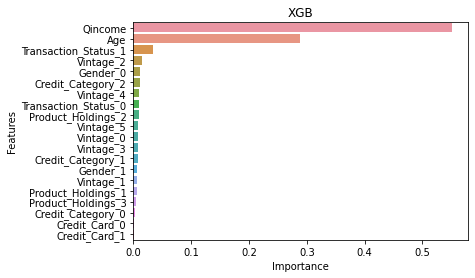

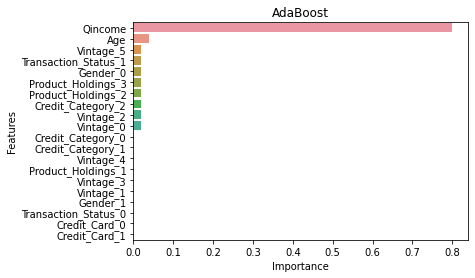

In [95]:
# Important features for 3 best performing classifier
for name, model in models2:
        base = model.fit(x_train_smote,y_train_smote)
        y_pred = base.predict(xtest)
        feature_imp = pd.Series(base.feature_importances_,
                        index=x_train_smote.columns).sort_values(ascending=False)

        sns.barplot(x=feature_imp, y=feature_imp.index)
        plt.xlabel('Importance')
        plt.ylabel('Features')
        plt.title(name)
        plt.show()

In [96]:
# Grid search cv was applied prior to get hyperparmeter tuning.
models = []
models.append(('XGB', GradientBoostingClassifier(random_state = 12345,learning_rate = 0.05, max_depth = 5, min_samples_split = 2, n_estimators = 500, subsample = 0.8)))
models.append(("AdaBoost", AdaBoostClassifier(random_state = 101,  learning_rate =1.29)))
models.append(("LR", LogisticRegression(random_state = 12345)))

# evaluate each model in turn
results = []
names = []

for name, model in models:

        model.fit(x_train_smote, y_train_smote)
        y_pred = model.predict(xtest)
        accuracy = f1_score(ytest, y_pred,average='macro')
        msg = "%s: (%f)" % (name, accuracy)
        print(msg)

XGB: (0.522379)
AdaBoost: (0.593696)
LR: (0.602985)


In [97]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import RepeatedStratifiedKFold

model = LogisticRegression()
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]

# define grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(x_train_smote, y_train_smote)
a_preds = grid_result.predict(xtest)
print("Logistic Regression accuracy")
print('Accuracy score',accuracy_score(ytest, a_preds))
print('F1 score - Logistic Regression',f1_score(ytest,a_preds,average='macro'))

# lr = LogisticRegression(random_state=12345)
# lr.fit(x_train_smote,y_train_smote)
# a_preds = lr.predict(xtest)
# print("Logistic Regression accuracy")
# print('Accuracy score',accuracy_score(ytest, a_preds))
# print('F1 score - Logistic Regression',f1_score(ytest,a_preds,average='macro'))

Logistic Regression accuracy
Accuracy score 0.706766917293233
F1 score - Logistic Regression 0.6029850746268657


In [98]:
from sklearn.ensemble import AdaBoostClassifier
a_model = AdaBoostClassifier(learning_rate = 1.23,random_state=101)
a_model.fit(x_train_smote,y_train_smote)
a_preds = a_model.predict(xtest)
print("AdaBoost Classifier accuracy")
print('Accuracy score',accuracy_score(ytest, a_preds))
print('F1 score - Ada Boost',f1_score(ytest,a_preds,average='macro'))

AdaBoost Classifier accuracy
Accuracy score 0.7180451127819549
F1 score - Ada Boost 0.6025297833697665


# Result: The model created as a result of AdaBoostClassifier hyperparameter optimization became the model with the maxium Accuracy Score. (0.718) and F1 score of (0.6025)

In [ ]:
test = test_df.drop(['ID'],axis=1) #make a copy of test data 
test.head() 

In [ ]:
test.shape #get the shape 

In [ ]:
pred_val1 = grid_result.predict(test) #predict on test data

In [ ]:
final_df = pd.DataFrame(data=pred_val1,columns=['Is_Churn'])  #create data frame with IS_churn column
# final_df

In [ ]:
# final_pred = pd.concat([test_df['ID'],final_df],axis=1) # Add ID Columns
# final_pred
# final_pred.to_csv('/content/LRfinal61.csv',index=False) # save result in csv format

# THANK YOU